In [2]:
from pathlib import Path

import pandas as pd

In [3]:
dates_to_visualize = [
    "2019-02",
    "2020-02",
    "2021-02",
    "2022-02",
    "2023-02",
    # "2024-02",
]

In [4]:
available_data_files = list(Path("../data/httparchive_metrics/nel_domain_resource_monitoring_stats").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2020-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2021-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2022-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2023-02.parquet')]

### Load deployment data

In [14]:
available_deployment_files = list(Path("../data/httparchive_metrics/nel_deployment").glob("*.parquet"))

used_deployment_files = list(filter(lambda file: file.stem in dates_to_visualize, available_deployment_files))
used_deployment_files

[WindowsPath('../data/httparchive_metrics/nel_deployment/2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2020-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2021-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2022-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2023-02.parquet')]

In [21]:
import numpy as np
from results.result_utils import date_to_text_format, concat_data_from_files

deployment = concat_data_from_files(used_deployment_files)
        
deployment['total_crawled_domains'] = np.floor(pd.to_numeric(deployment['total_crawled_domains'], errors='coerce')).astype('UInt32')
deployment['total_crawled_domains_with_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_domains_with_nel'], errors='coerce')).astype('UInt32')
deployment['total_crawled_domains_with_correct_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_domains_with_correct_nel'], errors='coerce')).astype('UInt32')
        
deployment['total_crawled_resources'] = np.floor(pd.to_numeric(deployment['total_crawled_resources'], errors='coerce')).astype('UInt32') 
deployment['total_crawled_resources_with_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_resources_with_nel'], errors='coerce')).astype('UInt32') 
deployment['total_crawled_resources_with_correct_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_resources_with_correct_nel'], errors='coerce')).astype('UInt32')
        
deployment["nel_percentage"] = \
        np.uint32(deployment['total_crawled_domains_with_correct_nel']) / np.uint32(deployment['total_crawled_domains']) * 100

deployment

,date,total_crawled_resources,total_crawled_domains,total_crawled_resources_with_nel,total_crawled_domains_with_nel,total_crawled_resources_with_correct_nel,total_crawled_domains_with_correct_nel,nel_percentage
0,2019-02,351105672,5707189,2592,382,2532,370,0.006483
0,2020-02,426587287,6636205,589195,109644,588014,109604,1.651607
0,2021-02,607075754,10147089,51156475,1008393,51150134,1008105,9.934918
0,2022-02,622531991,10363447,58326227,973629,58267984,972168,9.380740
0,2023-02,1174213534,19159612,109848257,2260772,109748008,2258979,11.790317


### Load TRANCO Popular domain list


In [5]:
from src.metric_utils import load_tranco_list_from_custom_path

tranco_dict = {}
for month in dates_to_visualize:
    months_list = load_tranco_list_from_custom_path(Path("../resources"), *month.split('-'))
    tranco_dict[month] = months_list

tranco_dict[month]

,order,popular_domain_name
0,1,google.com
1,2,a-msedge.net
2,3,youtube.com
3,4,facebook.com
4,5,microsoft.com
...,...,...
999995,999996,zio.to
999996,999997,tostado.com.ar
999997,999998,comnewsvideo.jp
999998,999999,direweb.it


### Aggregate result to visualize

In [6]:
from results.result_utils import date_to_text_format, concat_data_from_files

result = concat_data_from_files(used_data_files)

result['date_formatted'] = result['date'].map(date_to_text_format)

result

,date,url_domain,url_domain_hosted_resources,url_domain_hosted_resources_with_nel,url_domain_monitored_resources_ratio,date_formatted
0,2019-02,0d38c32709c097507fb7d35fbc48545e.report-uri.com,1,1,100.000000,Feb 2019
1,2019-02,1627f29bce741ebdc46108ecd8ebba3c.report-uri.com,1,1,100.000000,Feb 2019
2,2019-02,18d36df5be4d2f0680090c55b489865d.report-uri.com,1,1,100.000000,Feb 2019
3,2019-02,1e031bc28af67e84e052beae680ccd74.report-uri.com,1,1,100.000000,Feb 2019
4,2019-02,21torr.report-uri.com,2,2,100.000000,Feb 2019
...,...,...,...,...,...,...
1977381,2023-02,zzzw.de,63,62,98.410004,Feb 2023
1977382,2023-02,zzzz.bg,6,6,100.000000,Feb 2023
1977383,2023-02,zzzz.tw,42,42,100.000000,Feb 2023
1977384,2023-02,zzzzap.nl,37,37,100.000000,Feb 2023


### Filter result data to popular collector provider domains

In [7]:
popular_result = pd.DataFrame({})
for month in dates_to_visualize:
    month_result = result[result['date'] == month]
    
    month_result = month_result[month_result['url_domain'].isin(tranco_dict[month]['popular_domain_name'])]
    month_result.reset_index(drop=True, inplace=True)
    
    popular_result = pd.concat([popular_result, month_result])
    
popular_result

,date,url_domain,url_domain_hosted_resources,url_domain_hosted_resources_with_nel,url_domain_monitored_resources_ratio,date_formatted
0,2019-02,coinloan.io,55,51,92.73,Feb 2019
1,2019-02,easytithe.com,1,1,100.00,Feb 2019
2,2019-02,flightplandatabase.com,1,1,100.00,Feb 2019
3,2019-02,linustechtips.com,140,73,52.14,Feb 2019
4,2019-02,nodecraft.com,93,1,1.08,Feb 2019
...,...,...,...,...,...,...
66125,2023-02,zztt86.com,1,1,100.00,Feb 2023
66126,2023-02,zzup.com,67,67,100.00,Feb 2023
66127,2023-02,zzztube.com,13,13,100.00,Feb 2023
66128,2023-02,zzztube.tv,11,11,100.00,Feb 2023


### NEL Deployment on POPULAR domains

In [42]:
from results.result_utils import get_first_or_0

# result[['date', 'total_crawled_domains', 'total_crawled_domains_with_correct_nel', 'nel_percentage']]
deployment_result = pd.DataFrame({})
for month in dates_to_visualize:
    month_data = popular_result[popular_result['date'] == month].copy()
    
    month_result = pd.DataFrame({})
    
    month_result['date'] = [date_to_text_format(month)]
    month_result['total_crawled_domains'] = deployment[deployment['date'] == month]['total_crawled_domains']
    month_result['total_popular_crawled_domains_with_correct_nel'] = month_data['url_domain'].unique().size
    month_result['domain_nel_percentage'] = month_result['total_popular_crawled_domains_with_correct_nel'] / month_result['total_crawled_domains'] * 100
    
    month_result['total_crawled_resources'] = deployment[deployment['date'] == month]['total_crawled_resources']
    month_result['total_popular_crawled_resources_with_correct_nel'] = month_data['url_domain_hosted_resources_with_nel'].astype('UInt64').sum()
    month_result['resource_nel_percentage'] = month_result['total_popular_crawled_resources_with_correct_nel'] / month_result['total_crawled_resources'] * 100
    
    deployment_result = pd.concat([month_result, deployment_result])
    
deployment_result = deployment_result.sort_values(by=['date'])
deployment_result

,date,total_crawled_domains,total_popular_crawled_domains_with_correct_nel,domain_nel_percentage,total_crawled_resources,total_popular_crawled_resources_with_correct_nel,resource_nel_percentage
0,Feb 2019,5707189,13,0.000228,351105672,197,0.000056
0,Feb 2020,6636205,5904,0.088967,426587287,33786,0.00792
0,Feb 2021,10147089,57045,0.562181,607075754,3175909,0.523149
0,Feb 2022,10363447,59519,0.574317,622531991,4284569,0.688249
0,Feb 2023,19159612,66130,0.345153,1174213534,4514554,0.384475


<Axes: xlabel='date', ylabel='total_popular_crawled_domains_with_correct_nel'>

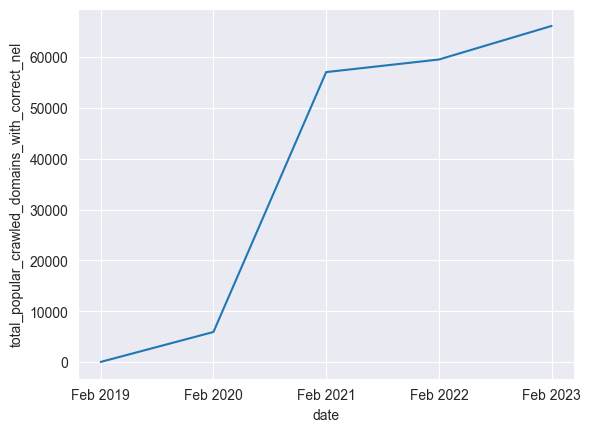

In [43]:
import seaborn as sns

sns.lineplot(deployment_result, x='date', y='total_popular_crawled_domains_with_correct_nel')